   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.0000

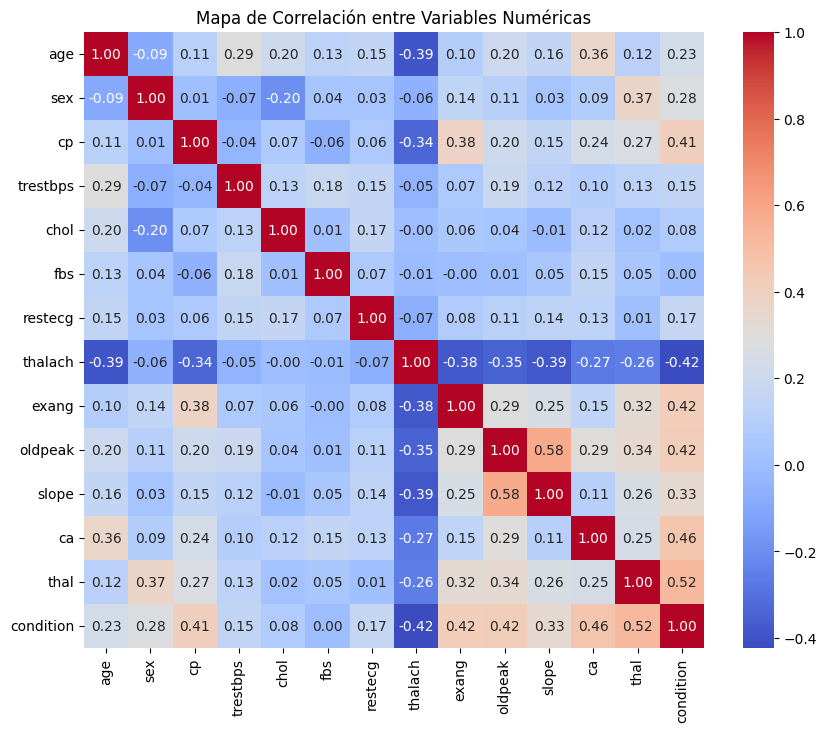

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV
data = pd.read_csv('./heart_cleveland_upload.csv')

# Verificar las primeras filas del dataframe
print(data.head())

# Resumen estadístico de los datos
print(data.describe())

# Verificar los tipos de datos y valores nulos
print(data.info())

# Verificar la correlación entre variables numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Correlación entre Variables Numéricas')
plt.show()


In [32]:
# Verificar si hay valores nulos
print(data.isnull().sum())

# Si hay valores nulos, podemos decidir cómo manejarlos (por ejemplo, reemplazarlos con la media o eliminar filas)
# En este caso, no hay valores nulos según los resultados previos, pero si los hubiera, usaríamos algo como esto:
# data = data.fillna(data.mean()) # Reemplazar nulos con la media de cada columna

# Codificar las variables categóricas (si es necesario)
# Por ejemplo, la columna 'sex' ya está codificada, pero podríamos necesitar hacerlo con otras columnas si fuera el caso.
# Aquí asumimos que ya están codificadas, si no fuera así, usaríamos pd.get_dummies()

# Normalizar las variables (por ejemplo, mediante StandardScaler)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Seleccionar las columnas numéricas para normalizar
numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca']
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Verificar el cambio
print(data.head())


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64
        age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  1.600302    1   0  1.596266 -0.257179    1        2 -0.812095      0   
1  1.600302    0   0  0.468418 -0.160859    0        0  0.061157      0   
2  1.268242    0   0  1.032342 -0.411292    0        0 -1.554358      0   
3  1.157555    1   0  0.355633  0.667499    1        2  1.065396      0   
4  1.046868    1   0 -1.223355 -0.700254    0        2 -0.244481      1   

    oldpeak     slope        ca  thal  condition  
0 -0.820813  0.643781  0.344824     0          0  
1  0.639470 -0.976583  1.411625     0          0  
2  1.326662  2.264145 -0.721976     0          0  
3  0.295874  0.643781  0.344824     0          1  
4  0.639470  0.643781 -0.721976     0          0  


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Definir las variables predictoras (X) y la variable objetivo (y)
X = data.drop(columns=['condition'])
y = data['condition']

# Entrenar un modelo de regresión logística para la selección de características
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X, y)

# Seleccionar las características más importantes
selector = SelectFromModel(log_reg, threshold="mean")
selector.fit(X, y)

# Ver qué características han sido seleccionadas
selected_features = X.columns[(selector.get_support())]
print("Características seleccionadas:", selected_features)


Características seleccionadas: Index(['sex', 'cp', 'fbs', 'exang', 'ca', 'thal'], dtype='object')


In [34]:
from sklearn.model_selection import train_test_split

# Dividir el dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificar las formas de los conjuntos
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(207, 13) (90, 13) (207,) (90,)


In [35]:
# Crear y entrenar el modelo de regresión logística
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Verificar los coeficientes del modelo
print("Coeficientes del modelo:", log_reg.coef_)


Coeficientes del modelo: [[-0.10789269  1.41253413  0.30601652  0.49504727  0.38966058 -0.87085091
   0.25299346 -0.65046762  0.4584608   0.56071387  0.26961354  1.12944743
   0.82302665]]


Precisión: 0.7777777777777778
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.80      0.77      0.79        48
           1       0.75      0.79      0.77        42

    accuracy                           0.78        90
   macro avg       0.78      0.78      0.78        90
weighted avg       0.78      0.78      0.78        90

Matriz de Confusión:
 [[37 11]
 [ 9 33]]


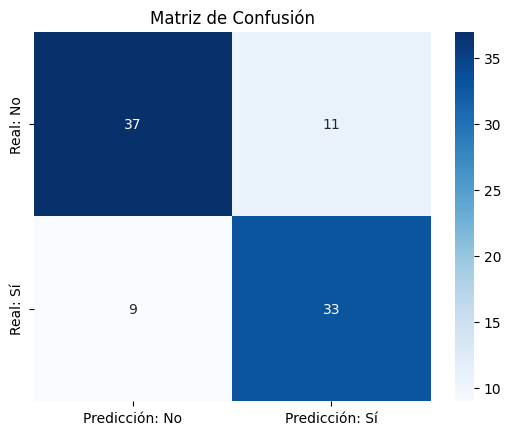

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predecir con el conjunto de prueba
y_pred = log_reg.predict(X_test)

# Evaluar el modelo con diferentes métricas
print("Precisión:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", conf_matrix)

# Graficar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicción: No', 'Predicción: Sí'], yticklabels=['Real: No', 'Real: Sí'])
plt.title('Matriz de Confusión')
plt.show()


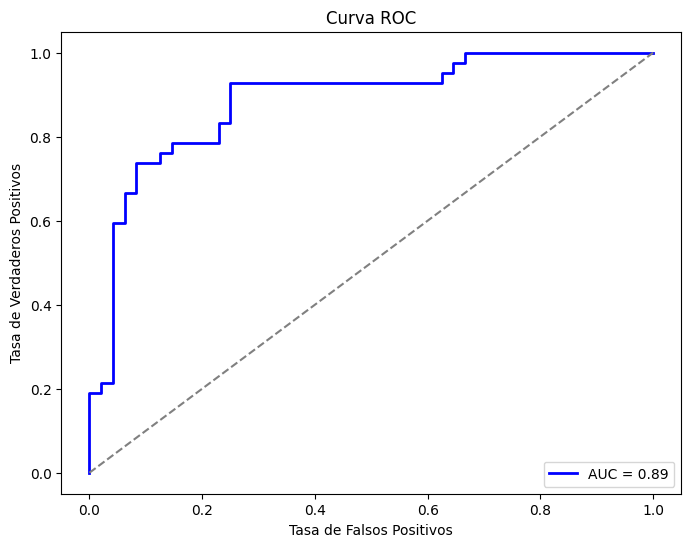

In [37]:
from sklearn.metrics import roc_curve, auc

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Curva ROC')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend(loc='lower right')
plt.show()
